## Importing Libraries

In [1]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For deep learning
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# For efficient performance by the model 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# For model evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Display plots in the notebook
%matplotlib inline

## Loading and Preprocessing of the data

In [2]:
# Loading CIFAR-10 image dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
print(train_images)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [4]:
# Let's check the shape of the data
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
print(train_labels)
print(test_labels)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [6]:
# Let's check the shape of the labels
print(train_labels.shape)
print(test_labels.shape)

(50000, 1)
(10000, 1)


In [7]:
# Normalizing the images in the dataset
train_images, test_images = train_images / 255.0, test_images / 255.0

In [8]:
# Now let's see training and test images in matrices form
print(train_images)

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

In [9]:
# Verify the shape of the loaded data
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Testing images shape:", test_images.shape)
print("Testing labels shape:", test_labels.shape)

Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing images shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


## Visualizing the data...

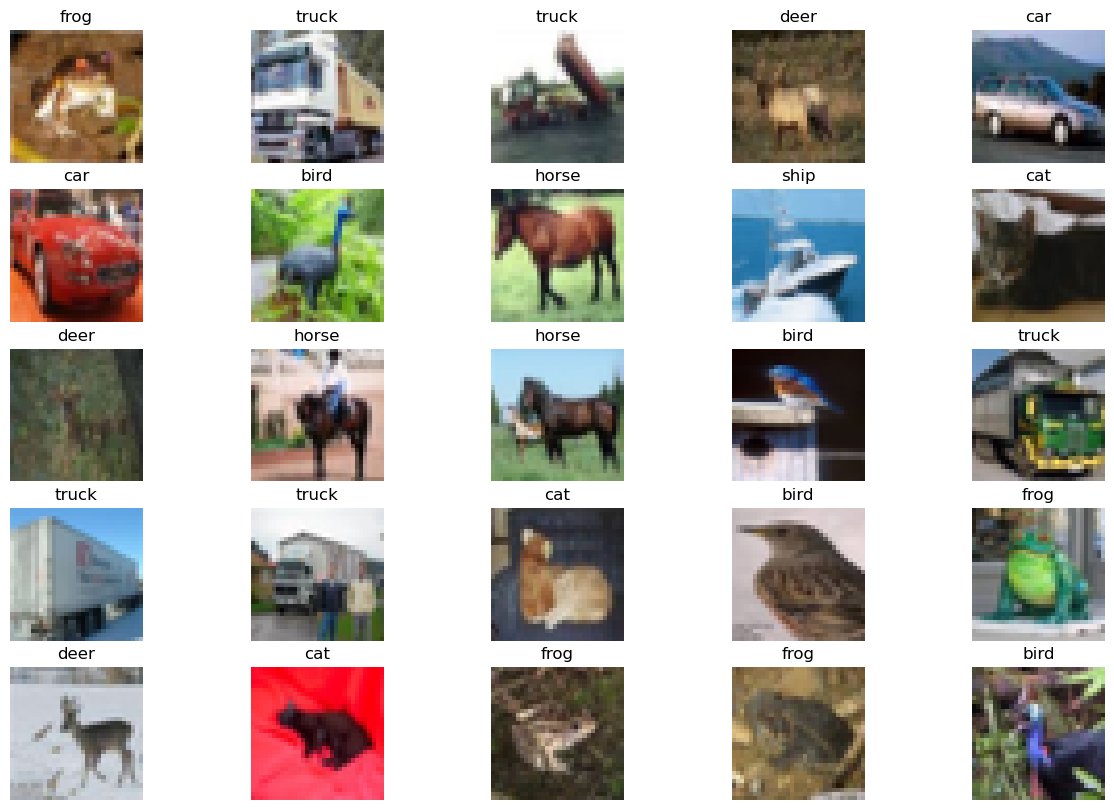

In [10]:
# Define class names for CIFAR-10
class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Function to display images with labels
def plot_images(images, labels, class_names, num_images=25):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.show()

# Display sample training images
plot_images(train_images, train_labels, class_names)

##  Visualising Class distribution, making sure each class has equal number of images/ datasets...

In [11]:
# This is the function used to visualize the Class distribution
def plot_class_distribution(labels, dataset_type):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=labels.flatten(), palette='viridis')
    plt.title(f'Class Distribution in {dataset_type} Data')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(ticks=np.arange(10), labels=class_names)
    plt.show()

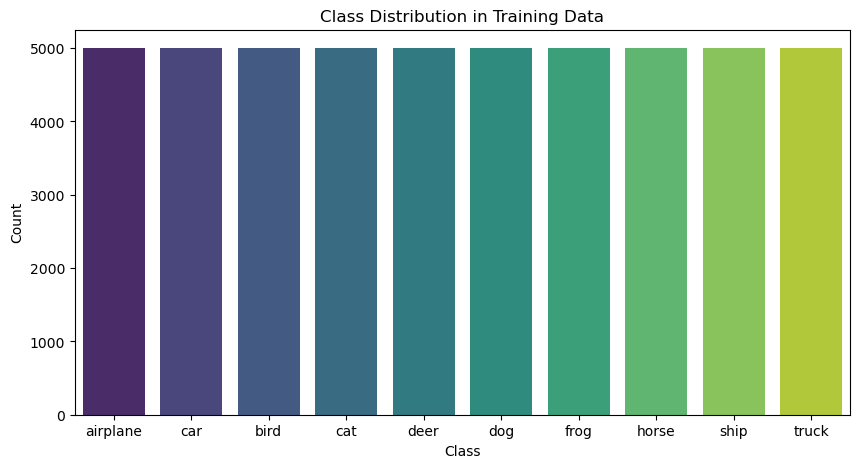

In [12]:
# Checking class distribution of the training data...
plot_class_distribution(train_labels, 'Training')

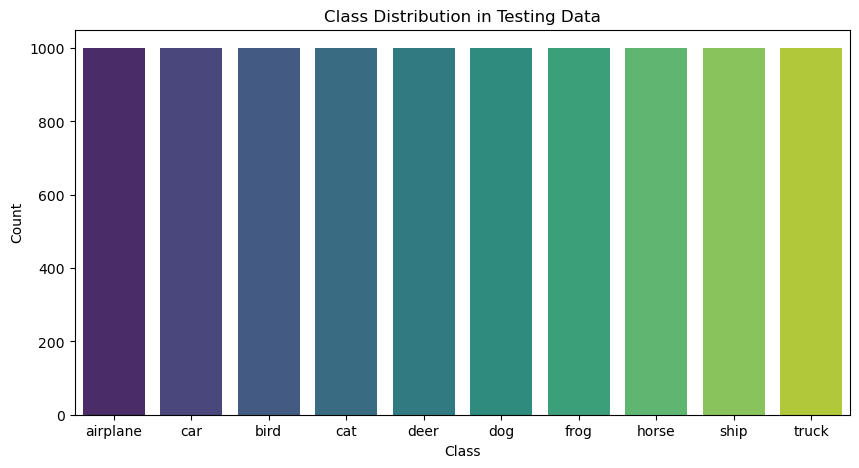

In [13]:
# Checking the class distibution for the testing data...
plot_class_distribution(test_labels, 'Testing')

### As we can see every class is equally disributed in terms of capacity of the data

## FEATURE ENGINEERING: One-hot encoding

In [14]:
# Let us check the train_labels and test_labels one more time...
print(f'Training labels : {train_labels}')
print(f'Testing labels : {test_labels}')

Training labels : [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
Testing labels : [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


### As you can see the above output of list of numbers vary in range of 1-10 this may cause issue while training data chances like model could mis-interpret so we are going to perform one-hot encoding

In [15]:
# Performing one-hot encoding
train_labels_one_hot = to_categorical(train_labels, num_classes=10)
test_labels_one_hot = to_categorical(test_labels, num_classes=10)

# Now let's look the the data...
print("One-hot encoded training labels :", train_labels_one_hot)
print("One-hot encoded testing labels :", test_labels_one_hot)

One-hot encoded training labels : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
One-hot encoded testing labels : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [16]:
# Let's see the changes before and after encoding in detail...
print("Training labels shape:", train_labels.shape)
print("Testing labels shape:", test_labels.shape)
print("One-hot encoded training labels shape:", train_labels_one_hot.shape)
print("One-hot encoded testing labels shape:", test_labels_one_hot.shape)

Training labels shape: (50000, 1)
Testing labels shape: (10000, 1)
One-hot encoded training labels shape: (50000, 10)
One-hot encoded testing labels shape: (10000, 10)


### As we can see that the first element (number of samples of data) remains unchanged where as the second element (which represents number of classes) has been changed from 1 --> 10 which is the differentiation of all the 10 classes in the label..

# Deep Learning models

## 1 . Convolutional Neural Network

In [17]:
# Firstly let's create a CNN model
model_CNN = Sequential()

# Convolutional layers
model_CNN.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_CNN.add(BatchNormalization())
model_CNN.add(Conv2D(32, (3, 3), activation='relu'))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D(2, 2))
model_CNN.add(Dropout(0.25))

model_CNN.add(Conv2D(64, (3, 3), activation='relu'))
model_CNN.add(BatchNormalization())
model_CNN.add(Conv2D(64, (3, 3), activation='relu'))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D(2, 2))
model_CNN.add(Dropout(0.25))

model_CNN.add(Conv2D(128, (3, 3), activation='relu'))
model_CNN.add(BatchNormalization())
model_CNN.add(Conv2D(128, (3, 3), activation='relu'))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D(1, 1))
model_CNN.add(Dropout(0.25))

# Flatten the Output of the convolutional layers
model_CNN.add(Flatten())

# Fully Connected Layer
model_CNN.add(Dense(10 ,activation = 'softmax'))

Metal device set to: Apple M2


2024-02-19 20:41:39.341510: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-19 20:41:39.341790: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [18]:
from tensorflow.keras.optimizers.legacy import Adam
METRICS = ['accuracy',tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
model_CNN.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=METRICS)

In [19]:
# Let's look into our model..
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

In [20]:
# Define callbacks
checkpoint = ModelCheckpoint("best_model_cnn.h5", save_best_only=True)
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

In [21]:
# To make model more robust and efficient we will use data augumentation technique..
# Use data augmentation for training
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [22]:
# And finally model fitting...
epochs = 30
batch_size = 256

history = model_CNN.fit(
    datagen.flow(train_images, train_labels_one_hot, batch_size=batch_size),
    steps_per_epoch=len(train_images) // batch_size,
    epochs=epochs,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/30


2024-02-19 20:41:44.255739: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-02-19 20:41:44.585688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


195/195 [==============================] - ETA: 0s - loss: 1.7350 - accuracy: 0.3959 - precision: 0.5363 - recall: 0.2186

2024-02-19 20:41:54.537082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


195/195 [==============================] - 14s 66ms/step - loss: 1.7350 - accuracy: 0.3959 - precision: 0.5363 - recall: 0.2186 - val_loss: 2.9452 - val_accuracy: 0.1324 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
195/195 [==============================] - 12s 60ms/step - loss: 1.2981 - accuracy: 0.5342 - precision: 0.6846 - recall: 0.3763 - val_loss: 2.6950 - val_accuracy: 0.2529 - val_precision: 0.3807 - val_recall: 0.1494
Epoch 3/30
195/195 [==============================] - 12s 59ms/step - loss: 1.1391 - accuracy: 0.5922 - precision: 0.7274 - recall: 0.4547 - val_loss: 1.0804 - val_accuracy: 0.6134 - val_precision: 0.7245 - val_recall: 0.5063
Epoch 4/30
195/195 [==============================] - 12s 59ms/step - loss: 1.0247 - accuracy: 0.6350 - precision: 0.7581 - recall: 0.5147 - val_loss: 1.1891 - val_accuracy: 0.6020 - val_precision: 0.6836 - val_recall: 0.5287
Epoch 5/30
195/195 [==============================] - 12s 59ms/step - loss: 0.9437 - accuracy: 0.66

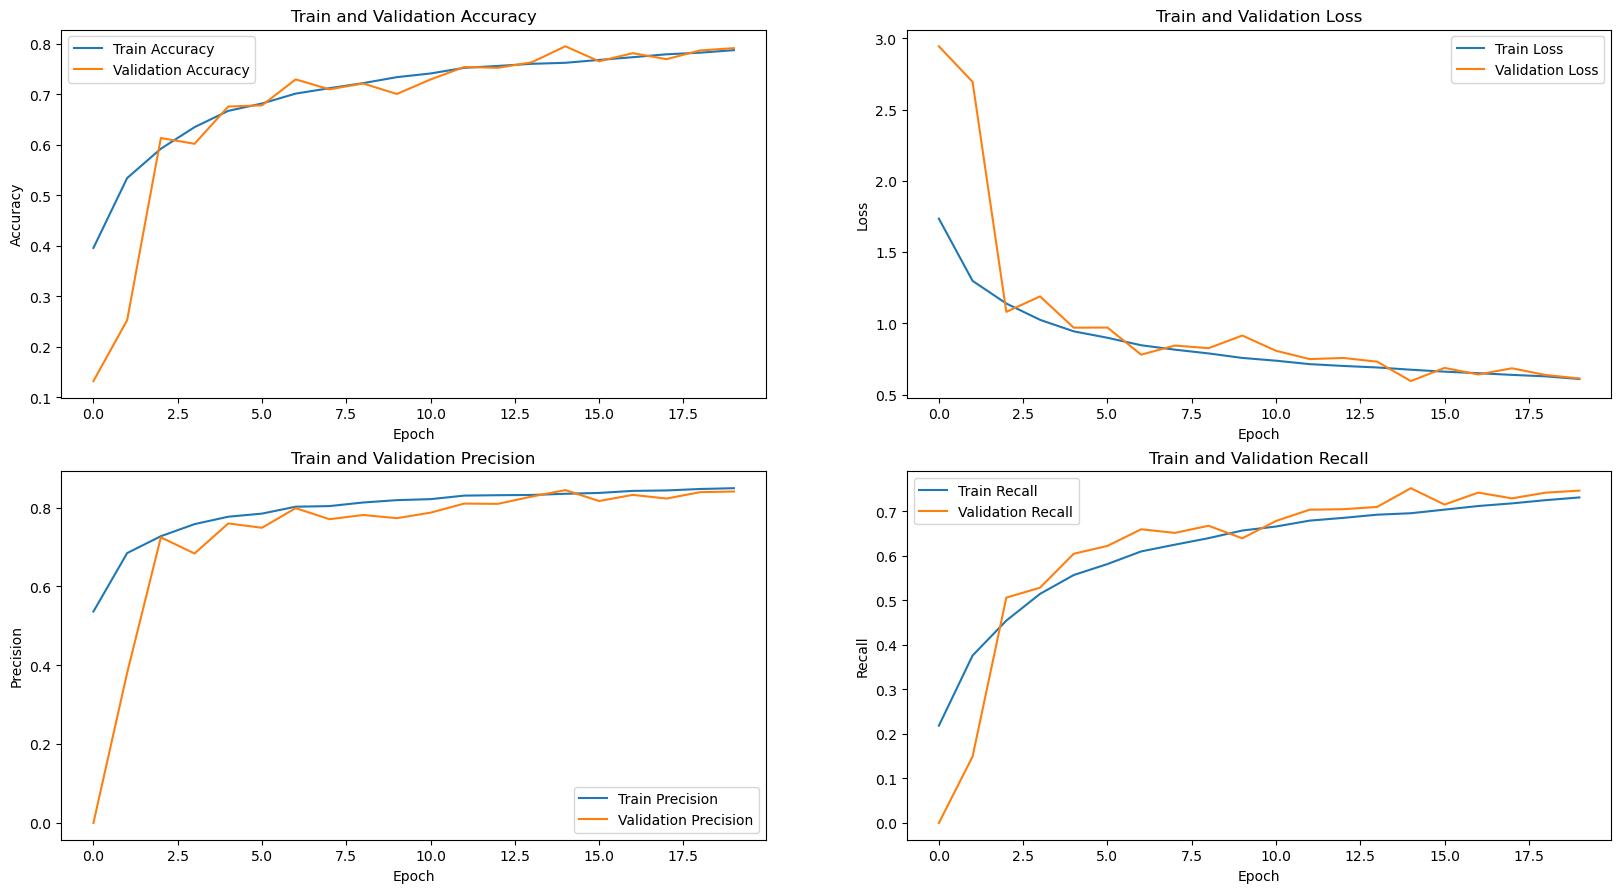

In [23]:
# Plotting accuracy
plt.figure(figsize=(20, 22))
plt.subplot(4, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()

# Plotting loss
plt.subplot(4, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()

# Plotting precision
plt.subplot(4, 2, 3)
plt.plot(history.history['precision'], label='Train Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Train and Validation Precision')
plt.legend()

# Plotting recall
plt.subplot(4, 2, 4)
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Train and Validation Recall')
plt.legend()

plt.show()

In [24]:
evaluation = model_CNN.evaluate(test_images, test_labels_one_hot)

# Let's calculate Accurracy and Loss...
print(f"\nTest Accuracy: {evaluation[1]*100:.2f}%")
print(f"Test Loss: {evaluation[0]:.4f}")

313/313 [==============================] - 4s 11ms/step - loss: 0.5946 - accuracy: 0.7950 - precision: 0.8444 - recall: 0.7522

Test Accuracy: 79.50%
Test Loss: 0.5946


In [25]:
# Let's predict against the test_set
predictions = model_CNN.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

 14/313 [>.............................] - ETA: 1s 

2024-02-19 20:46:45.644661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step


In [26]:
# For analysis and evaluation purposes let's convert labels (one-hot encoded data ) into original...
true_labels = np.argmax(test_labels_one_hot, axis=1)

In [27]:
# Create classification report for more understanding of model performance...
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

    airplane       0.81      0.84      0.82      1000
         car       0.89      0.92      0.90      1000
        bird       0.77      0.64      0.70      1000
         cat       0.65      0.62      0.63      1000
        deer       0.80      0.76      0.78      1000
         dog       0.74      0.65      0.69      1000
        frog       0.79      0.87      0.83      1000
       horse       0.76      0.88      0.81      1000
        ship       0.86      0.90      0.88      1000
       truck       0.86      0.88      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.79      0.80      0.79     10000
weighted avg       0.79      0.80      0.79     10000



In [28]:
# Let's understand the model performance with Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[838  14  21   8  11   1   4  19  53  31]
 [  6 918   1   2   1   1   2   3  13  53]
 [ 73   3 641  46  50  41  62  58  17   9]
 [ 23   9  46 616  42 120  63  51  14  16]
 [ 13   0  46  40 761  29  53  51   6   1]
 [ 10   3  30 151  40 649  31  76   5   5]
 [  8   3  17  58  12   8 873  11   9   1]
 [ 10   1  18  15  33  26   9 881   3   4]
 [ 37  23   4   6   4   1   3   4 897  21]
 [ 14  58   4   7   0   1   5   9  26 876]]


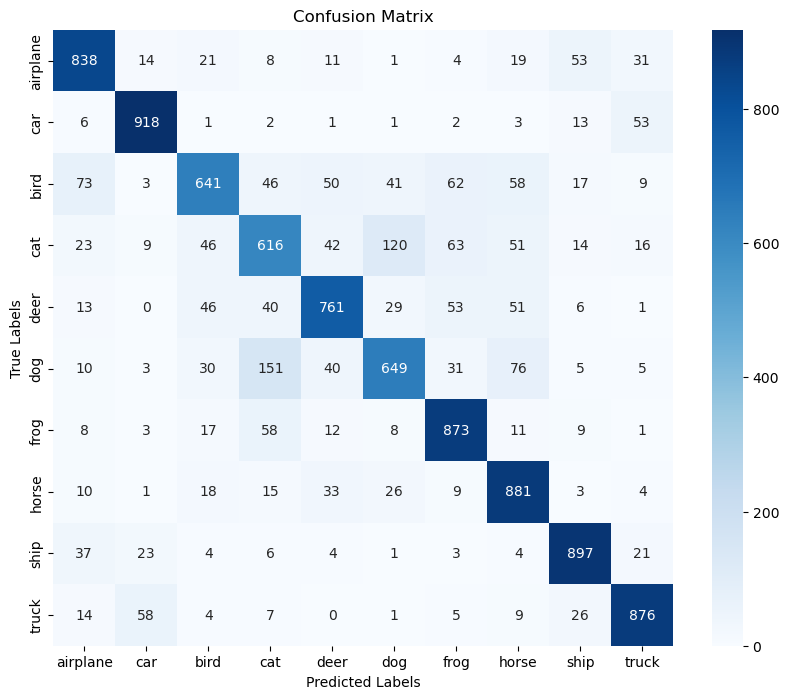

In [29]:
# Let's plot this(Confusion_matrix) using graph...

def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(conf_matrix, class_names)